# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [31]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


In [32]:
# Define where you are running the code: colab or local
RunInColab          = False    # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            = "./"

# Importing data

In [34]:
# Define the col names for the iris dataset
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'variety']

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from HHDD
df = pd.read_csv(url, names=column_names)

# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [35]:
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())
print("\nBasic statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

First few rows:
   sepal_length  sepal_width  petal_length  petal_width      variety
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Basic statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.0

2. Drop rows with any missing values


In [36]:
df = df.dropna()
print(f"Number of rows after dropping missing values: {len(df)}")

Number of rows after dropping missing values: 150


3. Encoding the class label categorical column: from string to num


In [37]:
# Encoding the categorical column {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['variety_encoded'] = le.fit_transform(df['variety'])
print("\nEncoded varieties:")
for i, label in enumerate(le.classes_):
    print(f"{label}: {i}")
print("\nDataset with encoded labels:")
print(df.head())

#Visualize the dataset



Encoded varieties:
Iris-setosa: 0
Iris-versicolor: 1
Iris-virginica: 2

Dataset with encoded labels:
   sepal_length  sepal_width  petal_length  petal_width      variety  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

   variety_encoded  
0                0  
1                0  
2                0  
3                0  
4                0  


Now the label/category is numeric


4. Discard columns that won't be used


In [ ]:
# If necesary, drop out non necesary columns


5. Scatter plot of the data

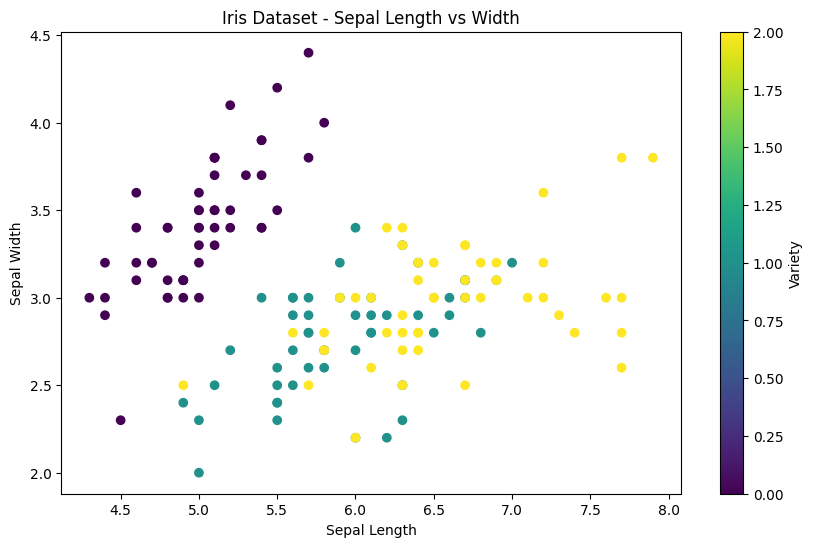

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(df['sepal_length'], df['sepal_width'], c=df['variety_encoded'], cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset - Sepal Length vs Width')
plt.colorbar(label='Variety')
plt.show()

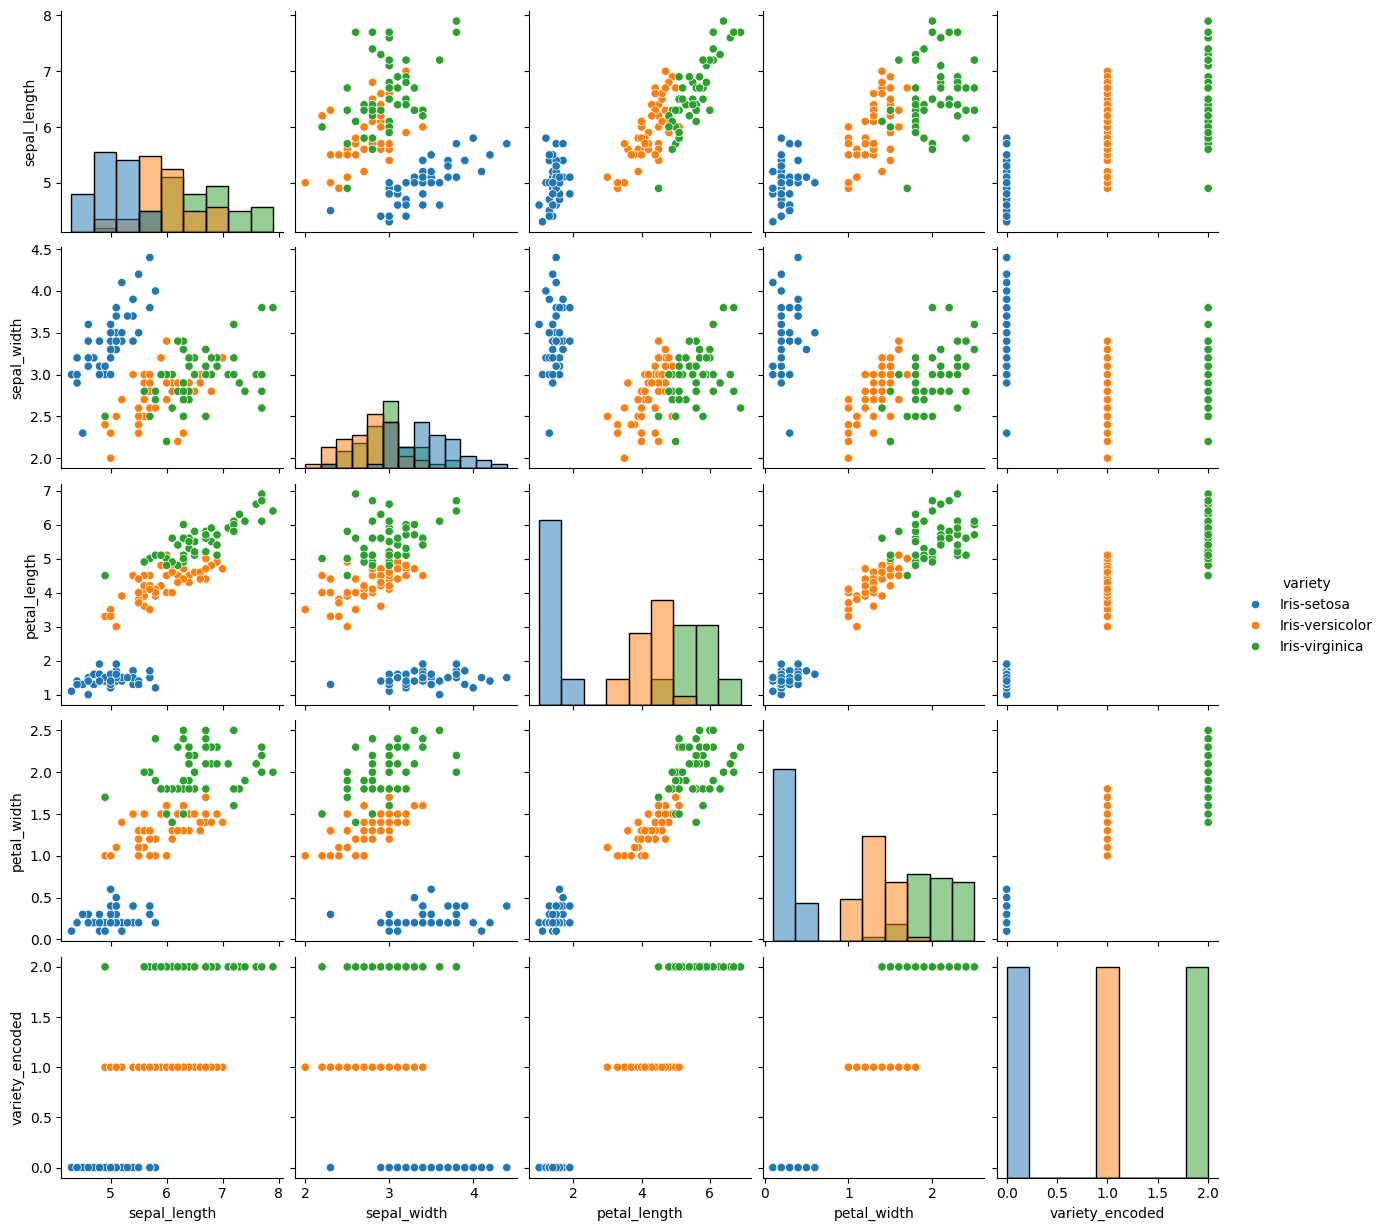

In [39]:
# Pairplot: Scatterplot of all variables
sns.pairplot(df, hue='variety', diag_kind='hist')
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

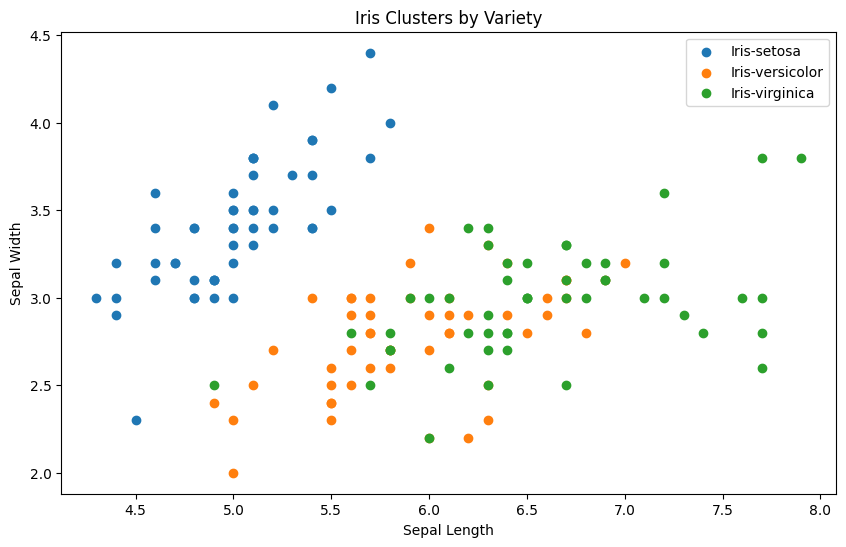

In [40]:
# Get dataframes for each real cluster
varieties = df['variety'].unique()
fig, ax = plt.subplots(figsize=(10, 6))

for i, variety in enumerate(varieties):
    variety_data = df[df['variety'] == variety]
    ax.scatter(variety_data['sepal_length'], 
              variety_data['sepal_width'], 
              label=variety)

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_title('Iris Clusters by Variety')
ax.legend()
plt.show()


Recall that for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [41]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define features for clustering
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Define number of clusters
n_clusters = 3

# Do K-means clustering (assing each point in the dataset to a cluster)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Print estimated cluster of each point in the dataset
print("Cluster labels:", cluster_labels[:10], "...")
print("\nCluster centers:\n", kmeans.cluster_centers_)
print("\nInertia (SSE):", kmeans.inertia_)
print("\nNumber of iterations:", kmeans.n_iter_)


Cluster labels: [1 1 1 1 1 1 1 1 1 1] ...

Cluster centers:
 [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.418      1.464      0.244     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]

Inertia (SSE): 78.94506582597731

Number of iterations: 12


NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [42]:
# Manual pairing the labels of the real and estimated clusters
cluster_to_variety = {
    0: 2,  # Map cluster 0 to variety 2
    1: 0,  # Map cluster 1 to variety 0
    2: 1   # Map cluster 2 to variety 1
}

In [43]:
# Add a new column to the dataset with the cluster information
df['predicted_cluster'] = np.array([cluster_to_variety[label] for label in cluster_labels])

In [44]:
# Label of the estimated clusters
print("Unique cluster labels:", np.unique(df['predicted_cluster']))

Unique cluster labels: [0 1 2]


In [45]:
# Cluster centroides
centroids = kmeans.cluster_centers_
print("\nCluster centroids:\n", centroids)



Cluster centroids:
 [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.418      1.464      0.244     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


In [46]:
# Sum of squared error (sse) of the final model
sse = kmeans.inertia_
print("\nSum of squared error (SSE):", sse)


Sum of squared error (SSE): 78.94506582597731


In [47]:
# The number of iterations required to converge
n_iter = kmeans.n_iter_
print("Number of iterations to converge:", n_iter)

Number of iterations to converge: 12


<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters

Plot estimated clusters

In [48]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

## Plot both real and estimated clusters to check for errors

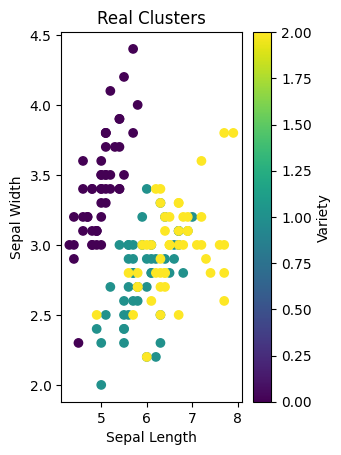

In [49]:

# First subplot: Real clusters
plt.subplot(1, 2, 1)
scatter1 = plt.scatter(df['sepal_length'], df['sepal_width'], 
                      c=df['variety_encoded'], cmap='viridis')
plt.title('Real Clusters')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.colorbar(scatter1, label='Variety')

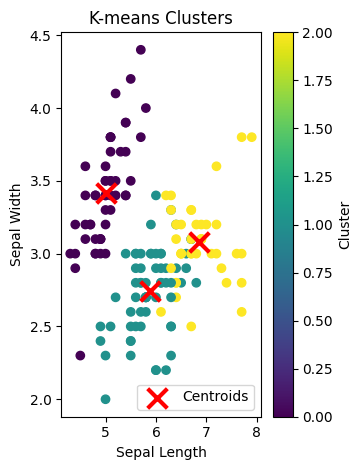

In [50]:
# Second subplot: Estimated clusters
plt.subplot(1, 2, 2)
scatter2 = plt.scatter(df['sepal_length'], df['sepal_width'], 
                      c=df['predicted_cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], 
           marker='x', s=200, linewidths=3, color='r', label='Centroids')
plt.title('K-means Clusters')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.colorbar(scatter2, label='Cluster')
plt.legend()

plt.tight_layout()
plt.show()

<span style='color:Blue'> **Important remarks**  </span>

- Note that for K=2 ...
- Note that for K=3 ...
- Note that for K=4 ...

Concluir

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

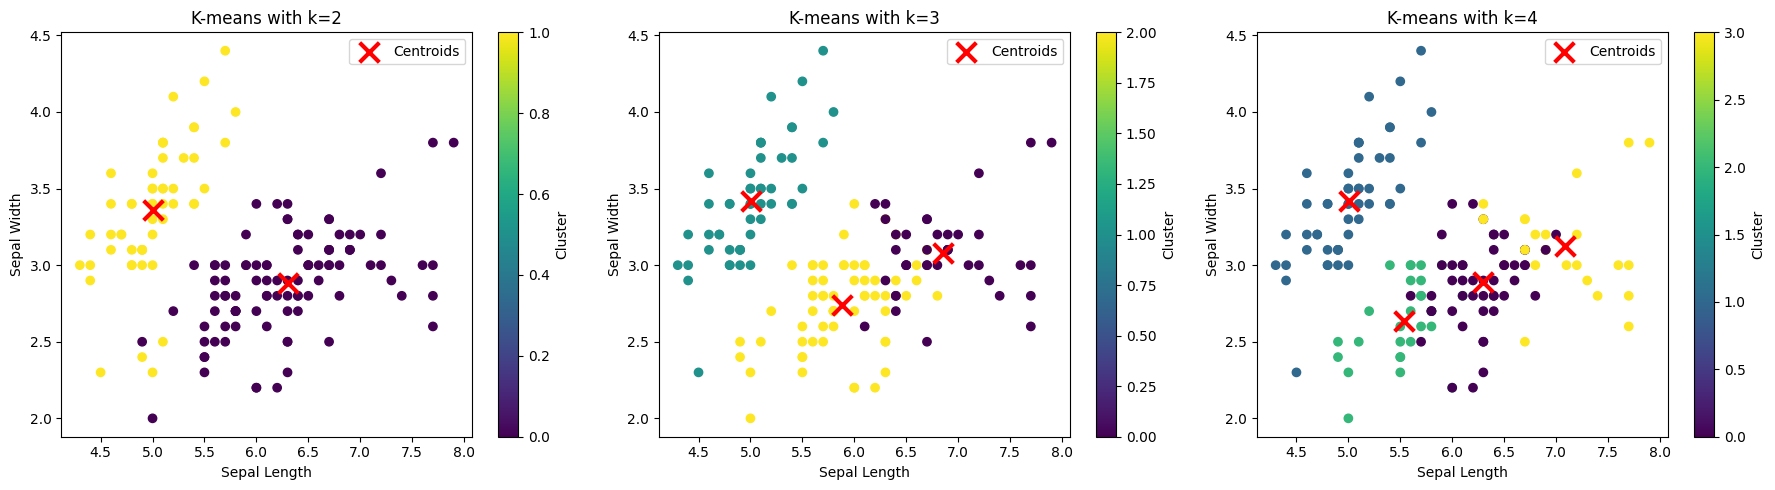

In [54]:
# Intialize a list to hold sum of squared error (sse)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Define values of k
k_values = [2, 3, 4]

# For each k

for idx, k in enumerate(k_values):
    # Perform k-means clustering
    kmeans_k = KMeans(n_clusters=k, random_state=42)
    cluster_labels_k = kmeans_k.fit_predict(X)
    
    # Plot
    scatter = axes[idx].scatter(df['sepal_length'], df['sepal_width'], 
                              c=cluster_labels_k, cmap='viridis')
    axes[idx].scatter(kmeans_k.cluster_centers_[:, 0], kmeans_k.cluster_centers_[:, 1], 
                     marker='x', s=200, linewidths=3, color='r', label='Centroids')
    axes[idx].set_title(f'K-means with k={k}')
    axes[idx].set_xlabel('Sepal Length')
    axes[idx].set_ylabel('Sepal Width')
    axes[idx].legend()
    plt.colorbar(scatter, ax=axes[idx], label='Cluster')

plt.tight_layout()
plt.show()



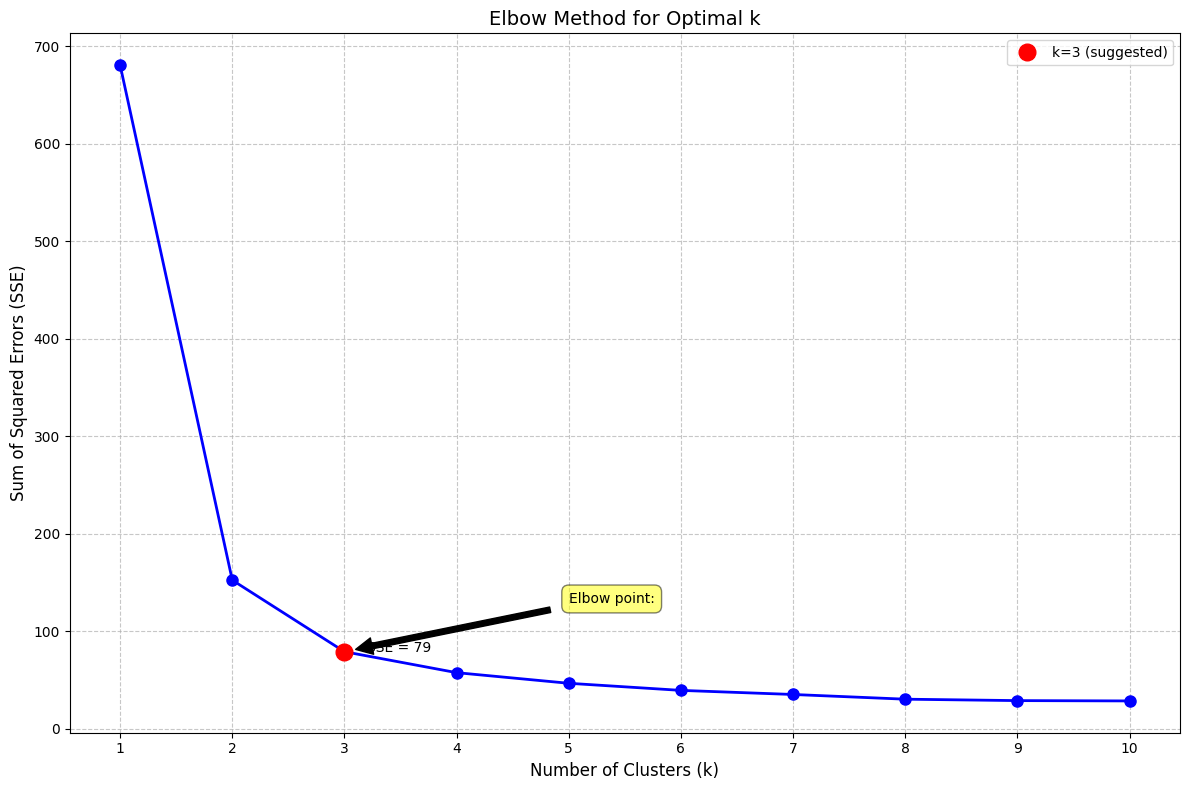


SSE values for each k:
k=1: SSE=680.82
k=2: SSE=152.37
k=3: SSE=78.95
k=4: SSE=57.44
k=5: SSE=46.54
k=6: SSE=39.25
k=7: SSE=35.04
k=8: SSE=30.22
k=9: SSE=28.76
k=10: SSE=28.42

Percentage decrease in SSE:
From k=1 to k=2: 77.62% decrease
From k=2 to k=3: 48.19% decrease
From k=3 to k=4: 27.24% decrease
From k=4 to k=5: 18.98% decrease
From k=5 to k=6: 15.65% decrease
From k=6 to k=7: 10.72% decrease
From k=7 to k=8: 13.77% decrease
From k=8 to k=9: 4.83% decrease
From k=9 to k=10: 1.15% decrease


In [56]:
# Plot sse versus k
# Initialize list to hold sum of squared errors (sse)
sse = []

# Define values of k to try
k_range = range(1, 11)  # Will try k from 1 to 10

# Calculate SSE for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Create elbow plot
plt.figure(figsize=(12, 8))
plt.plot(k_range, sse, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Sum of Squared Errors (SSE)', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Add markers for specific points
plt.plot(3, sse[2], 'ro', markersize=12, label='k=3 (suggested)')
plt.text(3.2, sse[2], f'SSE = {sse[2]:.0f}', fontsize=10)

# Customize the plot
plt.xticks(k_range)
plt.legend()

# Add annotation explaining the elbow method
plt.annotate('Elbow point:', 
             xy=(3, sse[2]), 
             xytext=(5, sse[2] + 50),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10,
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

plt.tight_layout()
plt.show()

# Print the SSE values for each k
print("\nSSE values for each k:")
for k, ss in zip(k_range, sse):
    print(f"k={k}: SSE={ss:.2f}")

# Calculate the percentage decrease in SSE
print("\nPercentage decrease in SSE:")
for i in range(1, len(sse)):
    decrease = ((sse[i-1] - sse[i]) / sse[i-1]) * 100
    print(f"From k={i} to k={i+1}: {decrease:.2f}% decrease")

Choose the k after which the sse is minimally reduced


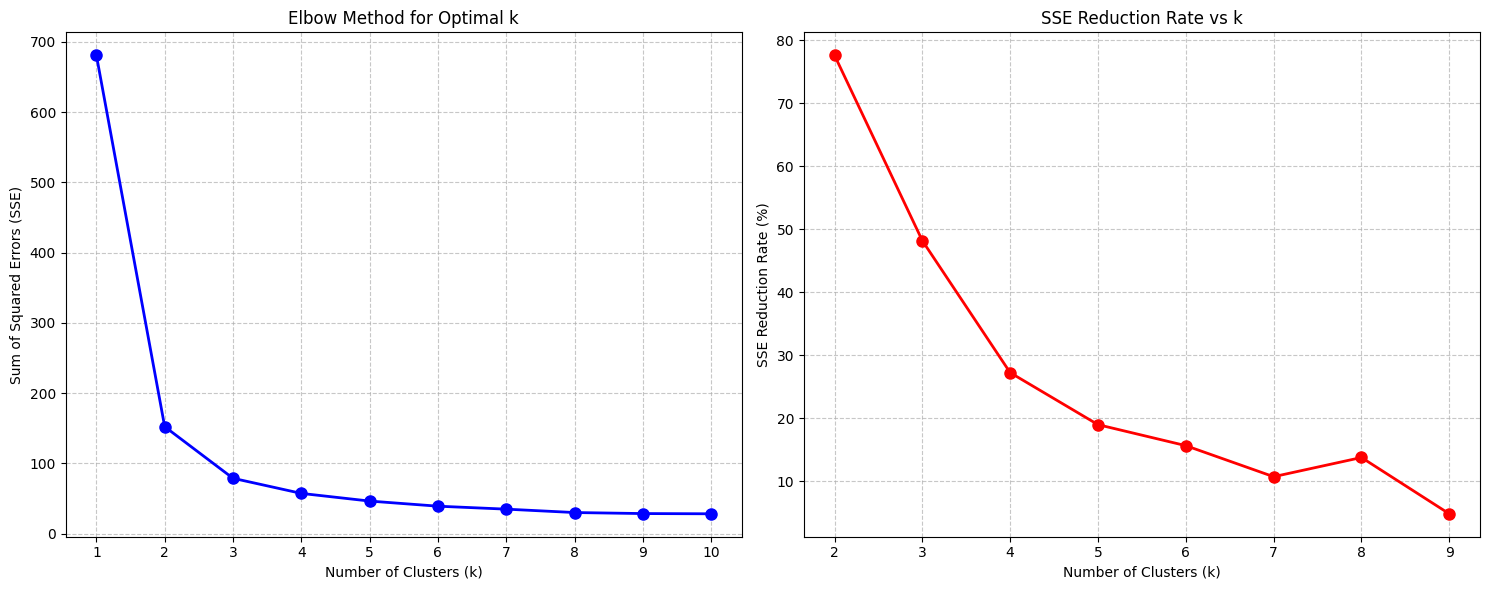

SSE Reduction Analysis:

k	SSE		Reduction Rate
----------------------------------------
2	152.37		77.62%
3	78.95		48.19%
4	57.44		27.24%
5	46.54		18.98%
6	39.25		15.65%
7	35.04		10.72%
8	30.22		13.77%
9	28.76		4.83%

Analysis Results:
The SSE reduction rate drops below 40% at k = 4

Recommendation:
Choose k = 4 as the optimal number of clusters because:
1. The SSE reduction rate drops significantly after k = 4


In [61]:
# Calculate the SSE reduction rate
sse_reduction = []
for i in range(1, len(sse)-1):
    reduction = ((sse[i-1] - sse[i]) / sse[i-1]) * 100
    sse_reduction.append(reduction)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Original Elbow Plot
ax1.plot(k_range, sse, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Sum of Squared Errors (SSE)')
ax1.set_title('Elbow Method for Optimal k')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.set_xticks(k_range)

# Plot 2: SSE Reduction Rate
ax2.plot(k_range[1:-1], sse_reduction, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('SSE Reduction Rate (%)')
ax2.set_title('SSE Reduction Rate vs k')
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.set_xticks(k_range[1:-1])

plt.tight_layout()
plt.show()

# Print detailed analysis
print("SSE Reduction Analysis:")
print("\nk\tSSE\t\tReduction Rate")
print("-" * 40)
for i in range(1, len(sse)-1):
    print(f"{i+1}\t{sse[i]:.2f}\t\t{sse_reduction[i-1]:.2f}%")

# Find the point where reduction rate drops significantly
threshold = 40  
optimal_k = 2 
for i, reduction in enumerate(sse_reduction):
    if reduction < threshold:
        optimal_k = i + 2
        break

print("\nAnalysis Results:")
print(f"The SSE reduction rate drops below {threshold}% at k = {optimal_k}")
print("\nRecommendation:")
print(f"Choose k = {optimal_k} as the optimal number of clusters because:")
print(f"1. The SSE reduction rate drops significantly after k = {optimal_k}")

# Final remarks

- The number of each cluster need to be assigned assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k